# XGBM AND LGBM

# Exploratory Data Analysis (EDA):

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
data1=pd.read_csv("C:\\Users\\Admin\\Desktop\\DS Assignments\\Titanic_train.csv")
data2=pd.read_csv("C:\\Users\\Admin\\Desktop\\DS Assignments\\Titanic_test.csv")

In [4]:
data1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data2

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
data1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data2.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
#missing values
data1.isnull().sum().sum()

866

In [9]:
data2.isnull().sum().sum()

414

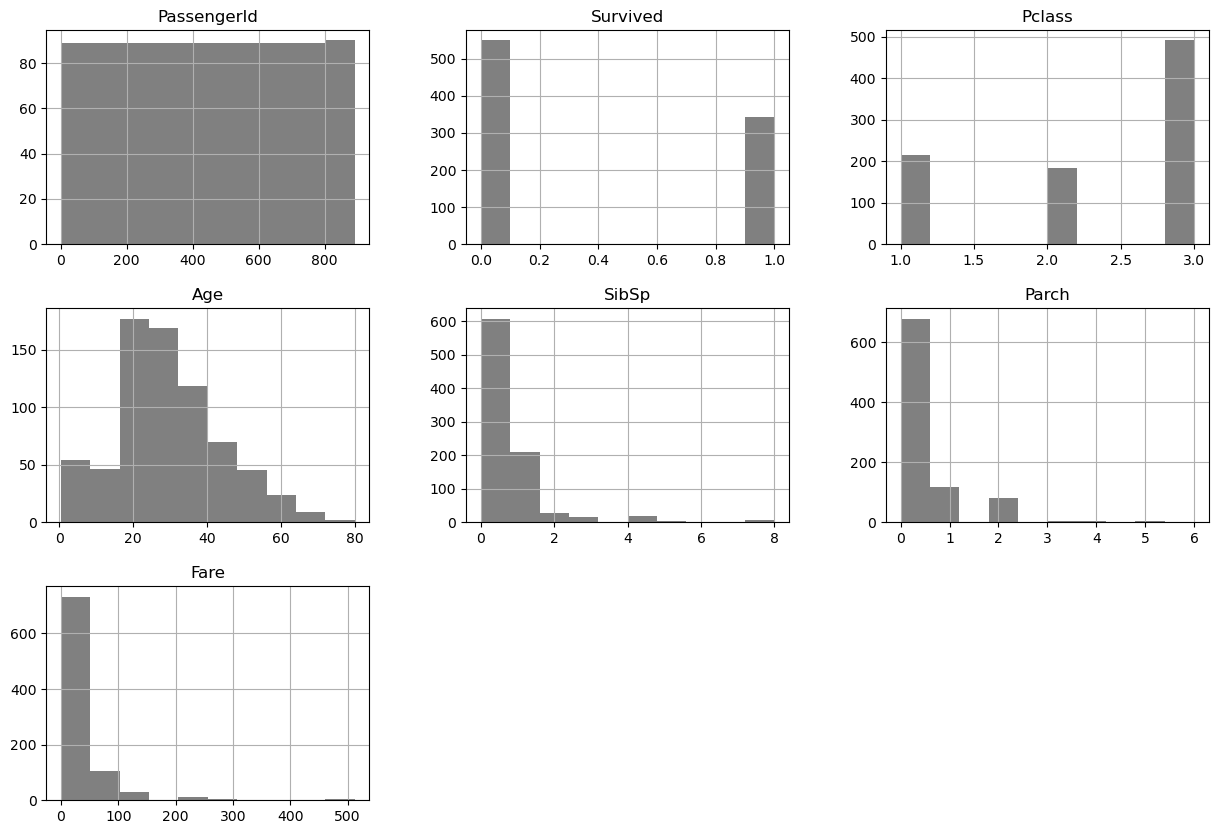

In [10]:
#histogram
data1.hist(figsize=(15,10),color='grey')
plt.show()

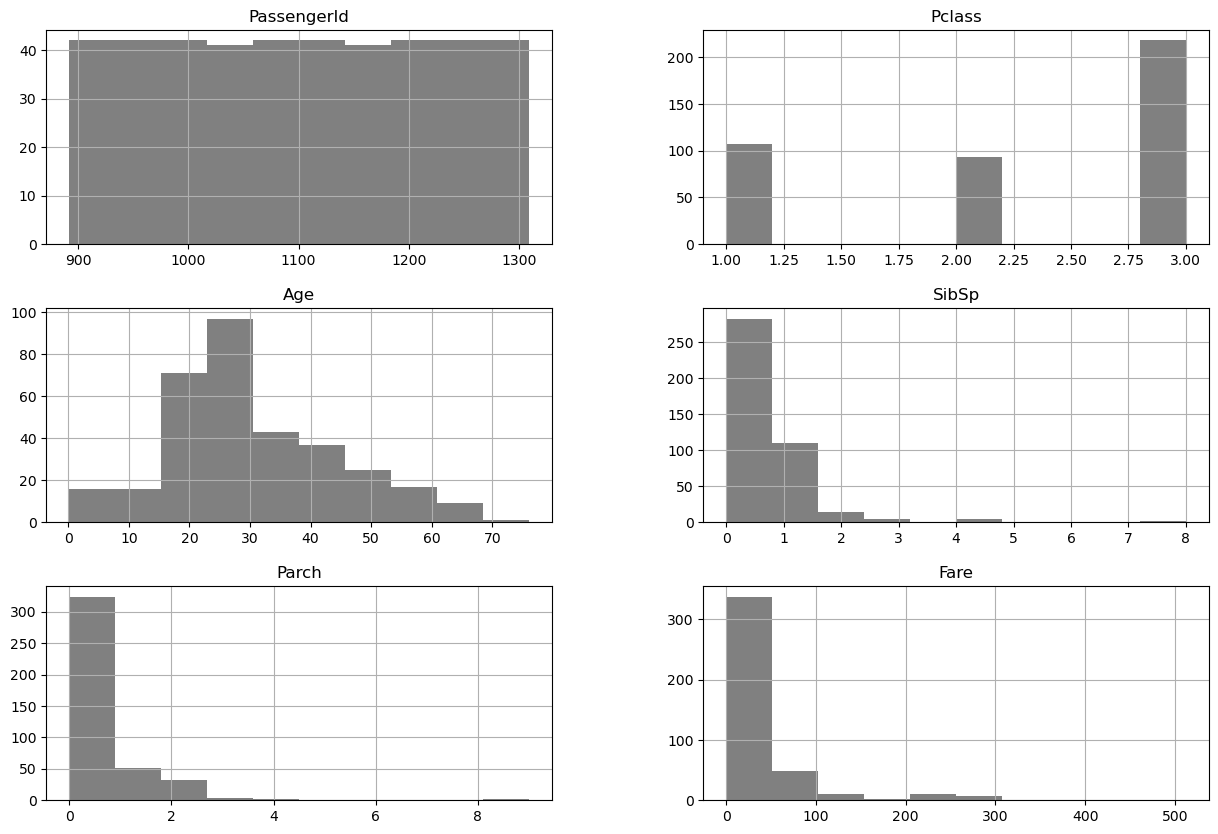

In [11]:
data2.hist(figsize=(15,10),color='grey')
plt.show()

<Axes: >

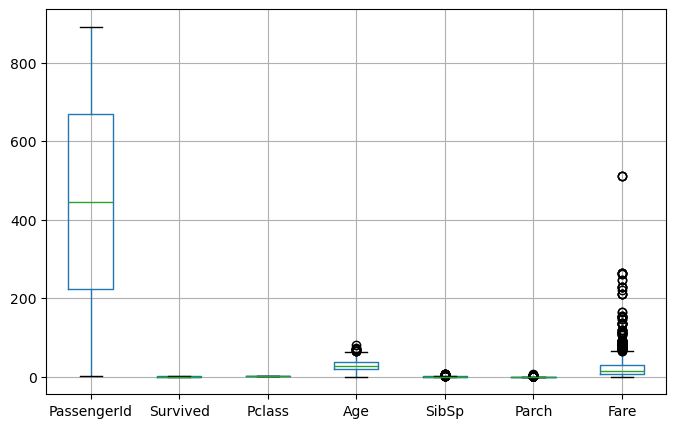

In [36]:
#boxplot
data1.boxplot(figsize=(8,5))

<Axes: >

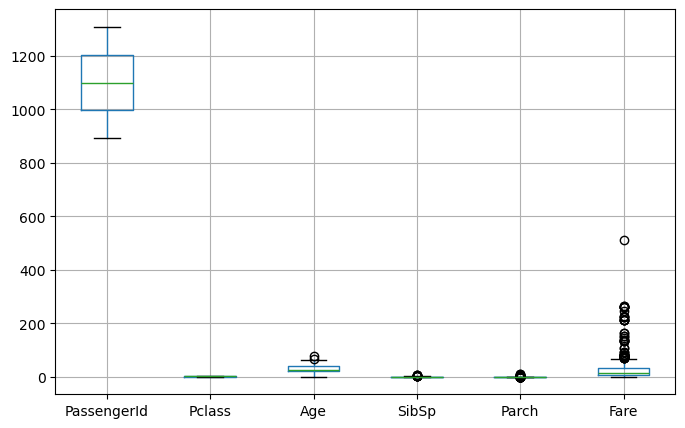

In [12]:
data2.boxplot(figsize=(8,5))

<Axes: >

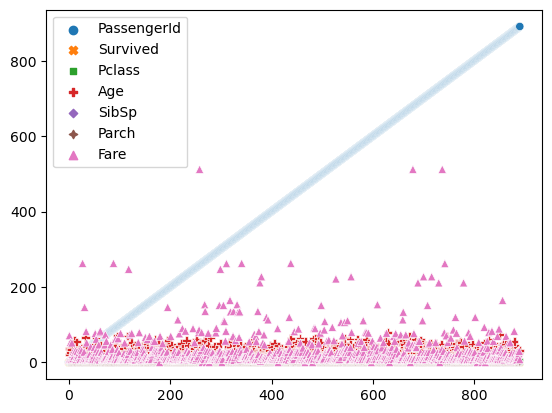

In [38]:
#scatterplot
sns.scatterplot(data1)

<Axes: >

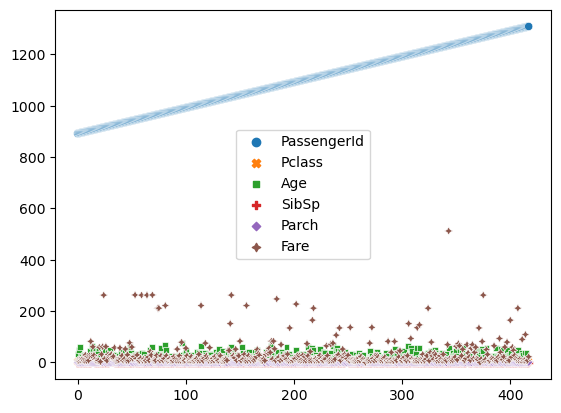

In [13]:
sns.scatterplot(data2)

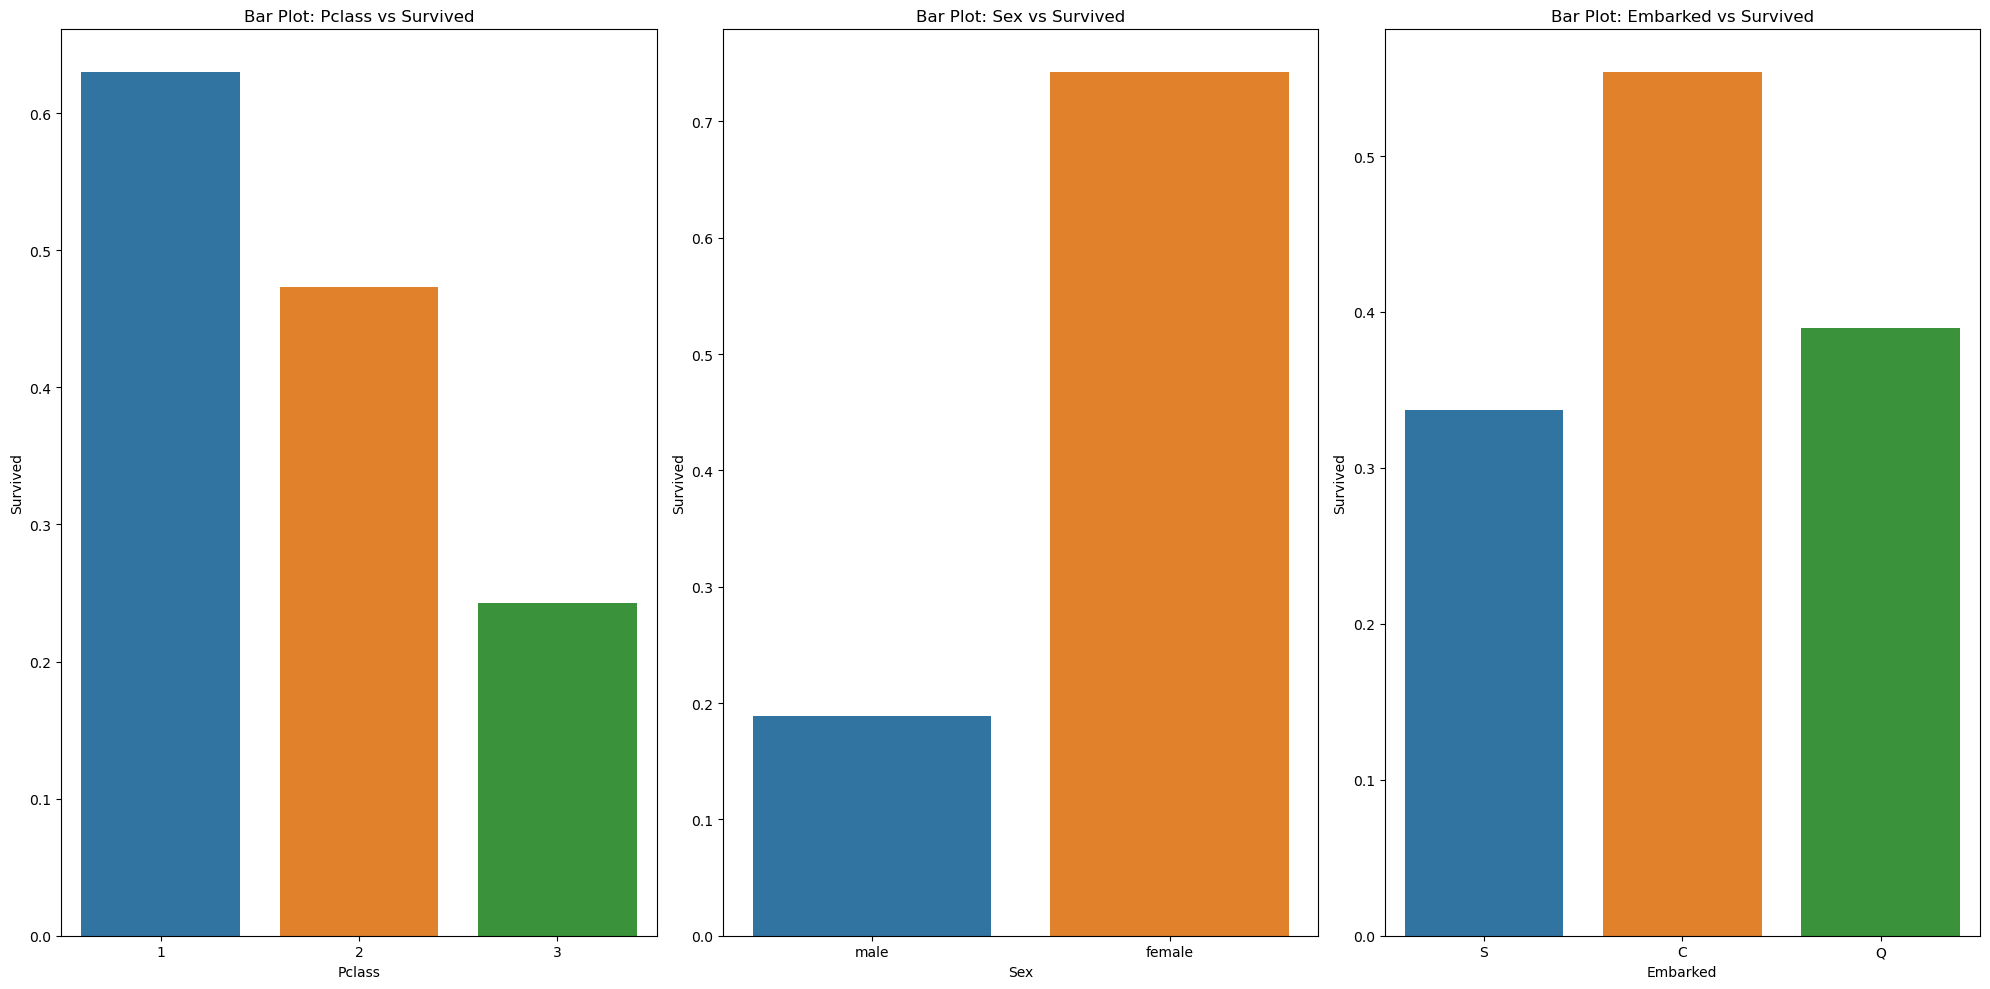

In [52]:
#Barchart
categorical_features = ['Pclass', 'Sex', 'Embarked']
plt.figure(figsize=(20, 10))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i + 1)
    sns.barplot(x=data1[feature], y=data1['Survived'], ci=None)
    plt.title(f'Bar Plot: {feature} vs Survived')
    plt.xlabel(feature)
    plt.ylabel('Survived')
plt.tight_layout()
plt.show()

# data preprocessing

In [15]:
from sklearn.impute import SimpleImputer
numerical_cols = data1.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = data2.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data1.select_dtypes(include=['object']).columns
categorical_cols = data2.select_dtypes(include=['object']).columns

In [22]:
numerical_cols
numerical_cols 
categorical_cols
categorical_cols 

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [17]:
# Impute numerical columns
num_imputer = SimpleImputer(strategy='median')
data1[numerical_cols] = num_imputer.fit_transform(data1[numerical_cols])
data2[numerical_cols] = num_imputer.fit_transform(data2[numerical_cols])

In [19]:
data1[numerical_cols]
data2[numerical_cols]

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892.0,3.0,34.5,0.0,0.0,7.8292
1,893.0,3.0,47.0,1.0,0.0,7.0000
2,894.0,2.0,62.0,0.0,0.0,9.6875
3,895.0,3.0,27.0,0.0,0.0,8.6625
4,896.0,3.0,22.0,1.0,1.0,12.2875
...,...,...,...,...,...,...
413,1305.0,3.0,27.0,0.0,0.0,8.0500
414,1306.0,1.0,39.0,0.0,0.0,108.9000
415,1307.0,3.0,38.5,0.0,0.0,7.2500
416,1308.0,3.0,27.0,0.0,0.0,8.0500


In [20]:
# Impute categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
data1[categorical_cols] = cat_imputer.fit_transform(data1[categorical_cols])
data2[categorical_cols] = cat_imputer.fit_transform(data2[categorical_cols])

In [21]:
data1[categorical_cols]
data2[categorical_cols] 

,Name,Sex,Ticket,Cabin,Embarked
0,"Kelly, Mr. James",male,330911,B57 B59 B63 B66,Q
1,"Wilkes, Mrs. James (Ellen Needs)",female,363272,B57 B59 B63 B66,S
2,"Myles, Mr. Thomas Francis",male,240276,B57 B59 B63 B66,Q
3,"Wirz, Mr. Albert",male,315154,B57 B59 B63 B66,S
4,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,3101298,B57 B59 B63 B66,S
...,...,...,...,...,...
413,"Spector, Mr. Woolf",male,A.5. 3236,B57 B59 B63 B66,S
414,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
415,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,B57 B59 B63 B66,S
416,"Ware, Mr. Frederick",male,359309,B57 B59 B63 B66,S


In [23]:
data1.isnull().sum().sum()

0

In [24]:
data2.isnull().sum().sum()

0

In [25]:
#Encode Categorical Variables
# One-hot encode the categorical variables
data1= pd.get_dummies(data1,dtype=int,drop_first=True)
print("Training Data After Encoding:")
data1.head()

Training Data After Encoding:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1.0,0,3.0,22.0,1.0,0.0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.0,1,1.0,38.0,1.0,0.0,71.2833,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1,3.0,26.0,0.0,0.0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4.0,1,1.0,35.0,1.0,0.0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5.0,0,3.0,35.0,0.0,0.0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
data2 = pd.get_dummies(data2,dtype=int, drop_first=True)
print("\nTest Data After Encoding:")
data2.head()


Test Data After Encoding:


,PassengerId,Pclass,Age,SibSp,Parch,Fare,"Name_Abelseth, Miss. Karen Marie","Name_Abelseth, Mr. Olaus Jorgensen","Name_Abrahamsson, Mr. Abraham August Johannes","Name_Abrahim, Mrs. Joseph (Sophie Halaut Easu)",...,Cabin_F,Cabin_F E46,Cabin_F E57,Cabin_F G63,Cabin_F2,Cabin_F33,Cabin_F4,Cabin_G6,Embarked_Q,Embarked_S
0,892.0,3.0,34.5,0.0,0.0,7.8292,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,893.0,3.0,47.0,1.0,0.0,7.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,894.0,2.0,62.0,0.0,0.0,9.6875,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,895.0,3.0,27.0,0.0,0.0,8.6625,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,896.0,3.0,22.0,1.0,1.0,12.2875,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
data2 = data2.reindex(columns=data1.columns,fill_value=0)

In [30]:
data2

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,892.0,0,3.0,34.5,0.0,0.0,7.8292,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,893.0,0,3.0,47.0,1.0,0.0,7.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,894.0,0,2.0,62.0,0.0,0.0,9.6875,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,895.0,0,3.0,27.0,0.0,0.0,8.6625,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,896.0,0,3.0,22.0,1.0,1.0,12.2875,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305.0,0,3.0,27.0,0.0,0.0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
414,1306.0,0,1.0,39.0,0.0,0.0,108.9000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
415,1307.0,0,3.0,38.5,0.0,0.0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
416,1308.0,0,3.0,27.0,0.0,0.0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
# Scale numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data1[numerical_cols] = scaler.fit_transform(data1[numerical_cols])
print("Training Data After Scaling:")
data2.head()

Training Data After Scaling:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,892.0,0,3.0,34.5,0.0,0.0,7.8292,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,893.0,0,3.0,47.0,1.0,0.0,7.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,894.0,0,2.0,62.0,0.0,0.0,9.6875,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,895.0,0,3.0,27.0,0.0,0.0,8.6625,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,896.0,0,3.0,22.0,1.0,1.0,12.2875,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [32]:
data2[numerical_cols] = scaler.transform(data2[numerical_cols])
print("\nTest Data After Scaling:")
data2.head()


Test Data After Scaling:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)","Name_Abelson, Mr. Samuel",...,Cabin_F G63,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_Q,Embarked_S
0,1.733996,0,0.827377,0.394887,-0.474545,-0.473674,-0.490783,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1.737884,0,0.827377,1.355510,0.432793,-0.473674,-0.507479,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1.741772,0,-0.369365,2.508257,-0.474545,-0.473674,-0.453367,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1.745659,0,0.827377,-0.181487,-0.474545,-0.473674,-0.474005,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.749547,0,0.827377,-0.565736,0.432793,0.767630,-0.401017,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# Building Predictive Models:

In [33]:
from sklearn.model_selection import train_test_split
X = data1.drop('Survived', axis=1)
y = data1['Survived']

In [34]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training set size: {X_train.shape}")
print(f"Validation set size: {X_valid.shape}")

Training set size: (712, 1725)
Validation set size: (179, 1725)


In [41]:
X_train.columns = X_train.columns.str.replace('[^A-Za-z0-9_]+', '',regex=True)
X_valid.columns = X_valid.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True)
data2.columns=  data2.columns.str.replace('[^A-Za-z0-9_]+','',regex=True)

In [47]:
X_train.columns 
X_valid.columns 
data2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Name_AbbottMrRossmoreEdward', 'Name_AbbottMrsStantonRosaHunt',
       'Name_AbelsonMrSamuel',
       ...
       'Cabin_FG63', 'Cabin_FG73', 'Cabin_F2', 'Cabin_F33', 'Cabin_F38',
       'Cabin_F4', 'Cabin_G6', 'Cabin_T', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=1726)

In [45]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
lgb_model = lgb.LGBMClassifier(n_estimators=150,max_depth=4,max_leaves=4,learning_rate=0.1)
# Train the model
lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] num_leaves is set=31, max_leaves=4 will be ignored. Current value: num_leaves=31
[LightGBM] [Warning] num_leaves is set=31, max_leaves=4 will be ignored. Current value: num_leaves=31
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002167 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 438
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

LGBMClassifier(max_depth=4, max_leaves=4, n_estimators=150)

In [48]:
y_pred_lgb = lgb_model.predict(X_valid)

[LightGBM] [Warning] num_leaves is set=31, max_leaves=4 will be ignored. Current value: num_leaves=31


In [49]:
lgb_accuracy = accuracy_score(y_valid, y_pred_lgb)
lgb_precision = precision_score(y_valid, y_pred_lgb)
lgb_recall = recall_score(y_valid, y_pred_lgb)
lgb_f1 = f1_score(y_valid, y_pred_lgb)

print(f"LightGBM Accuracy: {lgb_accuracy*100}")
print(f"LightGBM Precision: {lgb_precision*100}")
print(f"LightGBM Recall: {lgb_recall*100}")
print(f"LightGBM F1-Score: {lgb_f1*100}")

LightGBM Accuracy: 81.00558659217877
LightGBM Precision: 80.3030303030303
LightGBM Recall: 71.62162162162163
LightGBM F1-Score: 75.71428571428571


In [51]:
import xgboost as xgb
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_model = xgb.XGBClassifier(n_estimators=150,max_depth=4,max_leaves=4,learning_rate=0.1)
# Train the model
xgb_model.fit(train_X,train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=4,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [52]:
pred_xgb = xgb_model.predict(valid_X)

In [53]:
pred_xgb

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1])

In [54]:
xgb_accuracy = accuracy_score(valid_y, pred_xgb)
xgb_precision = precision_score(valid_y, pred_xgb)
xgb_recall = recall_score(valid_y, pred_xgb)
xgb_f1 = f1_score(valid_y, pred_xgb)

print(f"XGBoost Accuracy: {xgb_accuracy*100}")
print(f"XGBoost Precision: {xgb_precision*100}")
print(f"XGBoost Recall: {xgb_recall*100}")
print(f"XGBoost F1-Score: {xgb_f1*100}")

XGBoost Accuracy: 81.00558659217877
XGBoost Precision: 81.25
XGBoost Recall: 70.27027027027027
XGBoost F1-Score: 75.36231884057972


# comparative analysis

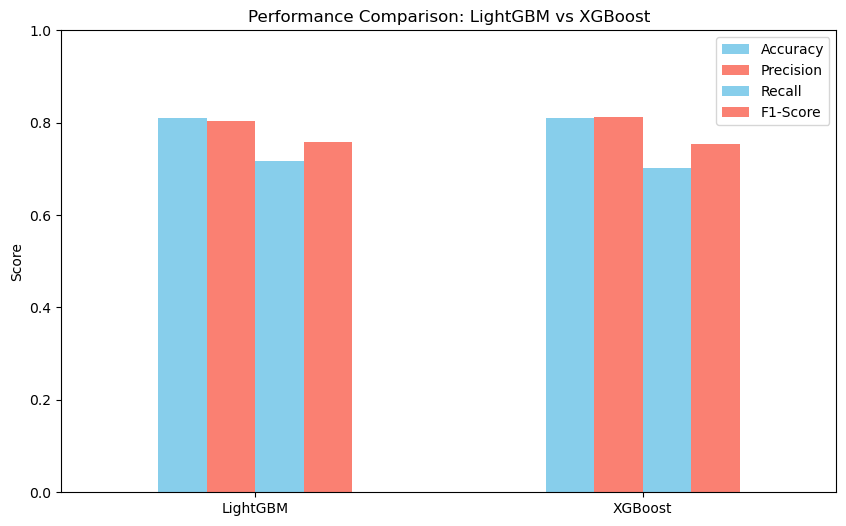

In [55]:
import matplotlib.pyplot as plt
import numpy as np
metrics = {
    'Accuracy': [lgb_accuracy, xgb_accuracy],
    'Precision': [lgb_precision, xgb_precision],
    'Recall': [lgb_recall, xgb_recall],
    'F1-Score': [lgb_f1, xgb_f1]}

# Create a bar plot for each metric
metrics_df = pd.DataFrame(metrics, index=['LightGBM', 'XGBoost'])

# Plotting
metrics_df.plot(kind='bar', figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('Performance Comparison: LightGBM vs XGBoost')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1)
plt.legend(loc='best')
plt.show()